## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.019757 -1.179608  1.515933  1.599335  0.385526  0.840452
1 -1.575380  0.677615  1.219754  0.089709 -1.390709 -1.111338
2  0.324620 -0.251408  0.473857 -1.086463  0.869538 -0.304817
3 -0.847911 -0.066428  1.090467  0.063436  0.144671 -0.152452
4 -0.629237  0.824495  0.719050 -0.795573 -0.860964 -0.622581


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9558450	total: 65.4ms	remaining: 1m 5s
1:	learn: 0.9481256	total: 65.9ms	remaining: 32.9s
2:	learn: 0.9394997	total: 66.6ms	remaining: 22.1s
3:	learn: 0.9300715	total: 67.1ms	remaining: 16.7s
4:	learn: 0.9220673	total: 67.8ms	remaining: 13.5s
5:	learn: 0.9135514	total: 68.5ms	remaining: 11.3s
6:	learn: 0.9052466	total: 69ms	remaining: 9.78s
7:	learn: 0.8975260	total: 69.5ms	remaining: 8.62s
8:	learn: 0.8904964	total: 70.1ms	remaining: 7.72s
9:	learn: 0.8832904	total: 70.8ms	remaining: 7.01s
10:	learn: 0.8760349	total: 71.4ms	remaining: 6.42s
11:	learn: 0.8682200	total: 71.9ms	remaining: 5.92s
12:	learn: 0.8607264	total: 72.4ms	remaining: 5.5s
13:	learn: 0.8533314	total: 72.9ms	remaining: 5.13s
14:	learn: 0.8453884	total: 73.4ms	remaining: 4.82s
15:	learn: 0.8383536	total: 73.9ms	remaining: 4.54s
16:	learn: 0.8308712	total: 74.3ms	remaining: 4.3s
17:	learn: 0.8236643	total: 74.8ms	remaining: 4.08s
18:	learn: 0.8175088	total: 75.3ms	remaining: 3.

91:	learn: 0.4637702	total: 109ms	remaining: 1.07s
92:	learn: 0.4597812	total: 109ms	remaining: 1.07s
93:	learn: 0.4566311	total: 110ms	remaining: 1.06s
94:	learn: 0.4535960	total: 110ms	remaining: 1.05s
95:	learn: 0.4497552	total: 111ms	remaining: 1.04s
96:	learn: 0.4466109	total: 111ms	remaining: 1.03s
97:	learn: 0.4427116	total: 111ms	remaining: 1.02s
98:	learn: 0.4396798	total: 112ms	remaining: 1.02s
99:	learn: 0.4358877	total: 112ms	remaining: 1.01s
100:	learn: 0.4334958	total: 113ms	remaining: 1s
101:	learn: 0.4298573	total: 113ms	remaining: 994ms
102:	learn: 0.4266946	total: 113ms	remaining: 986ms
103:	learn: 0.4233643	total: 114ms	remaining: 980ms
104:	learn: 0.4198636	total: 114ms	remaining: 974ms
105:	learn: 0.4171559	total: 115ms	remaining: 967ms
106:	learn: 0.4138792	total: 115ms	remaining: 959ms
107:	learn: 0.4113511	total: 115ms	remaining: 953ms
108:	learn: 0.4083521	total: 116ms	remaining: 947ms
109:	learn: 0.4048396	total: 116ms	remaining: 940ms
110:	learn: 0.4023123	to

258:	learn: 0.1429916	total: 188ms	remaining: 537ms
259:	learn: 0.1423873	total: 188ms	remaining: 536ms
260:	learn: 0.1414263	total: 189ms	remaining: 534ms
261:	learn: 0.1406686	total: 189ms	remaining: 533ms
262:	learn: 0.1399356	total: 190ms	remaining: 531ms
263:	learn: 0.1391887	total: 190ms	remaining: 530ms
264:	learn: 0.1381494	total: 190ms	remaining: 528ms
265:	learn: 0.1373630	total: 191ms	remaining: 527ms
266:	learn: 0.1368027	total: 191ms	remaining: 525ms
267:	learn: 0.1361256	total: 192ms	remaining: 523ms
268:	learn: 0.1352730	total: 192ms	remaining: 522ms
269:	learn: 0.1340782	total: 193ms	remaining: 521ms
270:	learn: 0.1330363	total: 193ms	remaining: 519ms
271:	learn: 0.1324432	total: 193ms	remaining: 518ms
272:	learn: 0.1317236	total: 194ms	remaining: 517ms
273:	learn: 0.1311266	total: 194ms	remaining: 515ms
274:	learn: 0.1299406	total: 195ms	remaining: 513ms
275:	learn: 0.1293135	total: 195ms	remaining: 512ms
276:	learn: 0.1283261	total: 196ms	remaining: 510ms
277:	learn: 

483:	learn: 0.0420190	total: 292ms	remaining: 312ms
484:	learn: 0.0417820	total: 293ms	remaining: 311ms
485:	learn: 0.0415338	total: 293ms	remaining: 310ms
486:	learn: 0.0412818	total: 294ms	remaining: 309ms
487:	learn: 0.0411117	total: 294ms	remaining: 309ms
488:	learn: 0.0408819	total: 295ms	remaining: 308ms
489:	learn: 0.0407197	total: 295ms	remaining: 307ms
490:	learn: 0.0405931	total: 295ms	remaining: 306ms
491:	learn: 0.0404301	total: 296ms	remaining: 306ms
492:	learn: 0.0401783	total: 296ms	remaining: 305ms
493:	learn: 0.0400555	total: 297ms	remaining: 304ms
494:	learn: 0.0398970	total: 298ms	remaining: 304ms
495:	learn: 0.0396879	total: 298ms	remaining: 303ms
496:	learn: 0.0395366	total: 299ms	remaining: 302ms
497:	learn: 0.0392907	total: 299ms	remaining: 302ms
498:	learn: 0.0390728	total: 300ms	remaining: 301ms
499:	learn: 0.0389265	total: 300ms	remaining: 300ms
500:	learn: 0.0386872	total: 301ms	remaining: 299ms
501:	learn: 0.0384763	total: 301ms	remaining: 299ms
502:	learn: 

645:	learn: 0.0189526	total: 372ms	remaining: 204ms
646:	learn: 0.0188682	total: 372ms	remaining: 203ms
647:	learn: 0.0188149	total: 373ms	remaining: 202ms
648:	learn: 0.0187316	total: 373ms	remaining: 202ms
649:	learn: 0.0186903	total: 373ms	remaining: 201ms
650:	learn: 0.0186433	total: 374ms	remaining: 200ms
651:	learn: 0.0185625	total: 374ms	remaining: 200ms
652:	learn: 0.0184824	total: 375ms	remaining: 199ms
653:	learn: 0.0184425	total: 375ms	remaining: 198ms
654:	learn: 0.0184033	total: 376ms	remaining: 198ms
655:	learn: 0.0183464	total: 376ms	remaining: 197ms
656:	learn: 0.0182955	total: 376ms	remaining: 197ms
657:	learn: 0.0182518	total: 377ms	remaining: 196ms
658:	learn: 0.0181968	total: 377ms	remaining: 195ms
659:	learn: 0.0181156	total: 378ms	remaining: 195ms
660:	learn: 0.0180699	total: 378ms	remaining: 194ms
661:	learn: 0.0180302	total: 379ms	remaining: 193ms
662:	learn: 0.0179855	total: 379ms	remaining: 193ms
663:	learn: 0.0179419	total: 379ms	remaining: 192ms
664:	learn: 

874:	learn: 0.0080159	total: 476ms	remaining: 68ms
875:	learn: 0.0079812	total: 477ms	remaining: 67.5ms
876:	learn: 0.0079735	total: 477ms	remaining: 67ms
877:	learn: 0.0079620	total: 478ms	remaining: 66.4ms
878:	learn: 0.0079365	total: 478ms	remaining: 65.8ms
879:	learn: 0.0079253	total: 479ms	remaining: 65.3ms
880:	learn: 0.0079004	total: 479ms	remaining: 64.7ms
881:	learn: 0.0078548	total: 480ms	remaining: 64.2ms
882:	learn: 0.0078300	total: 480ms	remaining: 63.6ms
883:	learn: 0.0078192	total: 481ms	remaining: 63.1ms
884:	learn: 0.0077949	total: 482ms	remaining: 62.7ms
885:	learn: 0.0077510	total: 483ms	remaining: 62.1ms
886:	learn: 0.0077206	total: 483ms	remaining: 61.5ms
887:	learn: 0.0077101	total: 483ms	remaining: 61ms
888:	learn: 0.0076862	total: 484ms	remaining: 60.4ms
889:	learn: 0.0076670	total: 484ms	remaining: 59.9ms
890:	learn: 0.0076566	total: 485ms	remaining: 59.3ms
891:	learn: 0.0076271	total: 485ms	remaining: 58.7ms
892:	learn: 0.0076098	total: 486ms	remaining: 58.2ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

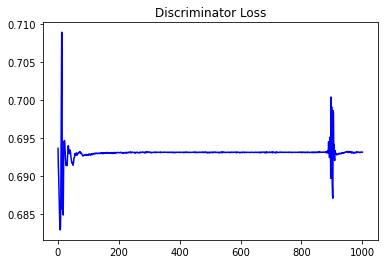

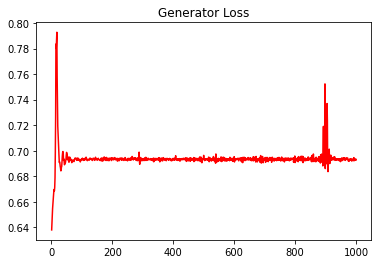

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.30850828511863043


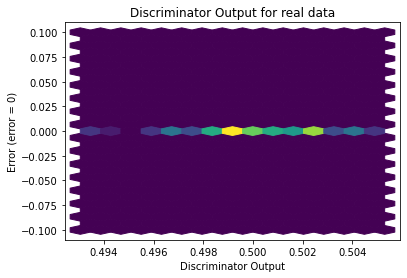

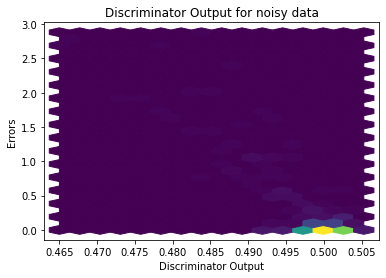

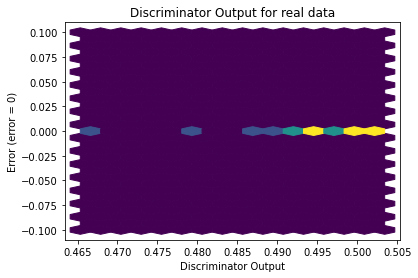

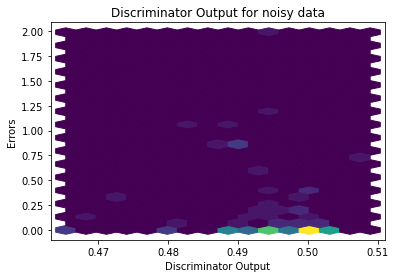

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


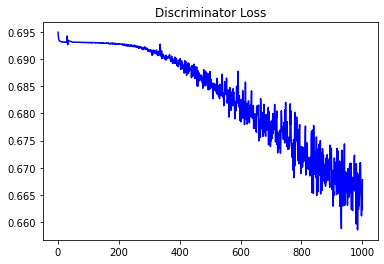

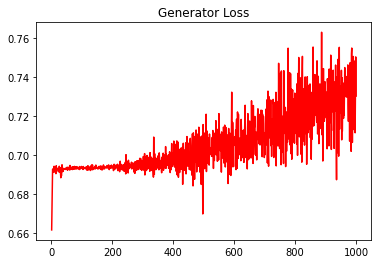

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.3586221162717283


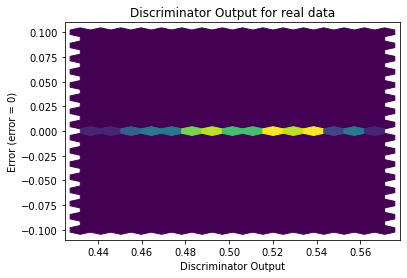

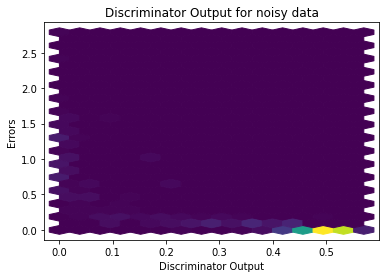

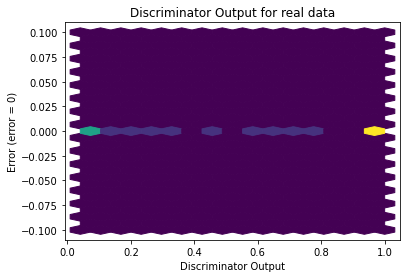

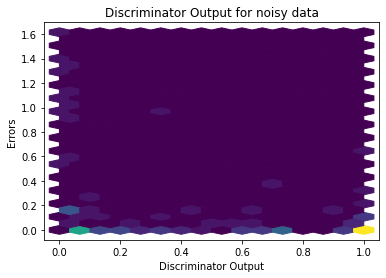

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
